Decision Tree Ensemble

-> RandomForest(Classifier, Regressor)

-> GradientBoosting(Classifier, Regressor)

-> Bagging(Bootstrap aggregating)
 
-> AdaBoost

-> Extra-Trees

In [11]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

In [3]:
Xm,ym=make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)
cancer=load_breast_cancer()
Xc_train,Xc_test,yc_train,yc_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

※Bagging

-> Bootstrap sampling

-> 분류기 선택

-> 분류기가 predict_proba() 를 지원하는 경우 확률값을 평균하여 예측 수행 / 지원하지 않는 경우 빈도 가장 높은 클래스로 예측 수행

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging=BaggingClassifier(LogisticRegression(),n_estimators=100,oob_score=True,n_jobs=-1,random_state=42) #n_jobs : CPU몇개 돌릴건지, oob_score=True : 부트스트래핑에 포함되지 않은 샘플 기반으로 훈련된 모델 평가->세트 성능 짐작 가능 (RandomForestClasifier에도 가능)
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [7]:
print('훈련 세트 정확도 : {:.3f}'.format(bagging.score(Xc_train,yc_train)))
print('테스트 세트 정확도 : {:.3f}'.format(bagging.score(Xc_test,yc_test)))
print('OOB 샘플 정확도 : {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도 : 0.953
테스트 세트 정확도 : 0.937
OOB 샘플 정확도 : 0.944


In [12]:
from sklearn.tree import DecisionTreeClassifier
bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,n_jobs=-1,random_state=42) #랜덤포레스트와 비슷
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

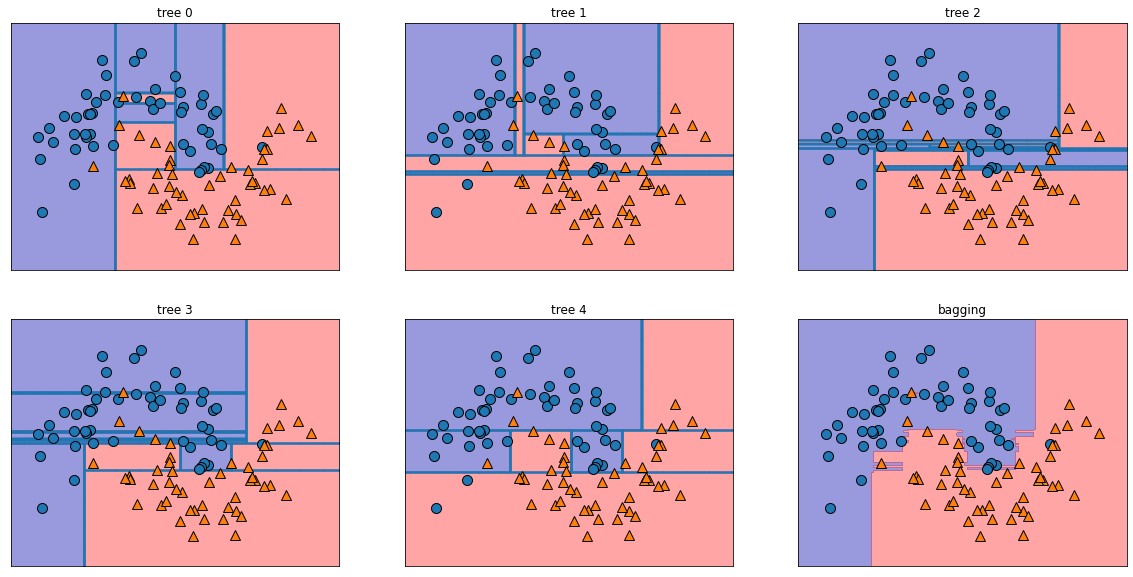

In [14]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('bagging')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)

In [16]:
bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,random_state=42,oob_score=True,n_jobs=-1)
bagging.fit(Xc_train,yc_train)
print('훈련 세트 정확도 : {:.3f}'.format(bagging.score(Xc_train,yc_train)))
print('테스트 세트 정확도 : {:.3f}'.format(bagging.score(Xc_test,yc_test)))
print('OOB 샘플 정확도 : {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.944
OOB 샘플 정확도 : 0.953


Bagging으로 만든 RandomForest와 실제 RandomForest 차이점

-max_samples(부트스트랩 샘플 크기) 지정(O/X)

-DecisionTree의 매개변수 이용가능 :ex) splitter='random'(무작위로 분할한 후보 노드 중 최선의 분할 찾음) / splitter='best'로 고정

※Extra-Trees

->Bootstrap sampling X

->DecisionTreeClassifier(splitter='random') -> bias(편향) 증가, var(분산) 감소

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
xtree=ExtraTreesClassifier(n_estimators=5,n_jobs=-1,random_state=0)
xtree.fit(Xm_train,ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

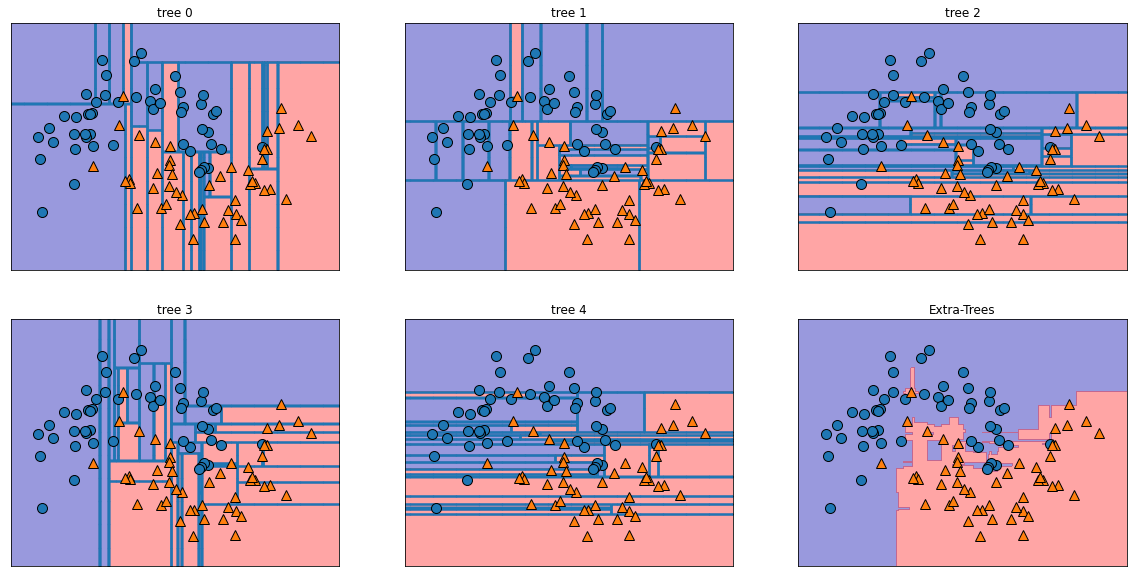

In [20]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),xtree.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
mglearn.plots.plot_2d_separator(xtree,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Extra-Trees')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)

In [21]:
xtree=ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=0)
xtree.fit(Xc_train,yc_train)
print('훈련 세트 정확도 : {:.3f}'.format(xtree.score(Xc_train,yc_train)))
print('테스트 세트 정확도 : {:.3f}'.format(xtree.score(Xc_test,yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.944


Text(0.5, 0, 'feature_importances')

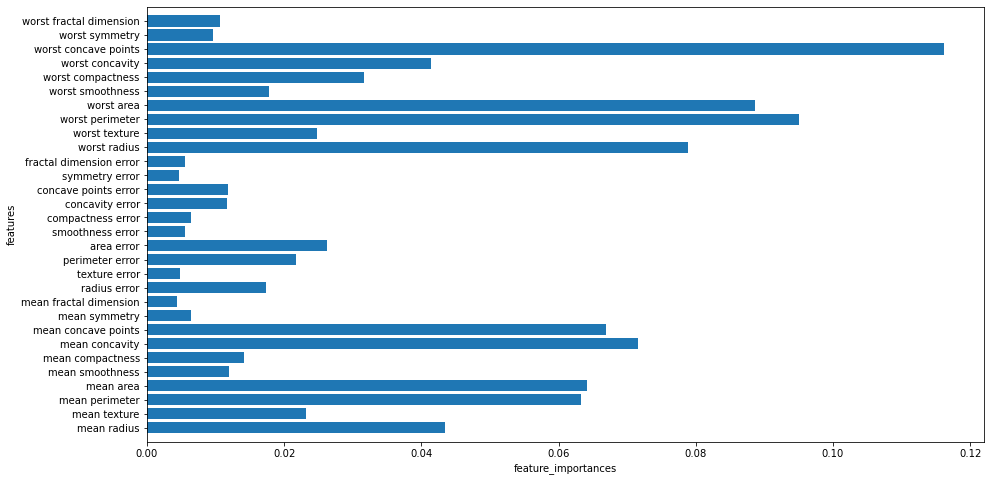

In [26]:
plt.figure(figsize=(15,8))
plt.barh(np.arange(len(cancer.feature_names)),xtree.feature_importances_,align='center')
plt.yticks(np.arange(len(cancer.feature_names)),cancer.feature_names)
plt.ylabel('features')
plt.ylim(-1,cancer.data.shape[1])
plt.xlabel('feature_importances')

※AdaBoost(Adaptive Boosting)

->weak learner(약한 학습기)

->GradientBoosting은 오차를 경사하강법으로 보완했다면 Ada는 잘못분류한 샘플 가중치를 높여

->훈련된 각 모델들은 성능에 따라 가중치 부여 ->모델이 예측한 레이블 기준 모델의 가중치 합산하여 가장 큰 값 레이블 선택

->GradientBoosting 처럼 순차적 학습이기때문에 n_jobs 없음

->default : DecisionTree (base_estimator로 모델변경 가능)

->Classifier : max_depth=1 / Regressor : max_depth=3

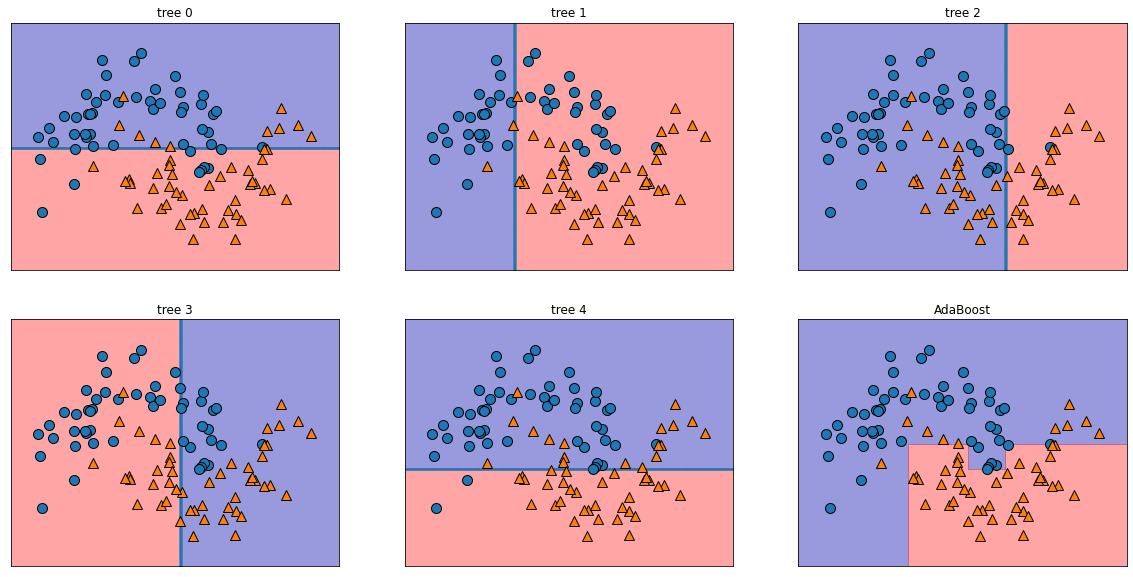

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=5,random_state=42)
ada.fit(Xm_train,ym_train)
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
mglearn.plots.plot_2d_separator(ada,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('AdaBoost')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)

AdaBoostClassifier는 tree max_depth=1 이므로 분할 선이 1개임

In [28]:
ada=AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(Xc_train,yc_train)
print('훈련 세트 정확도 : {:.3f}'.format(ada.score(Xc_train,yc_train)))
print('테스트 세트 정확도 : {:.3f}'.format(ada.score(Xc_test,yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


(-1.0, 30.0)

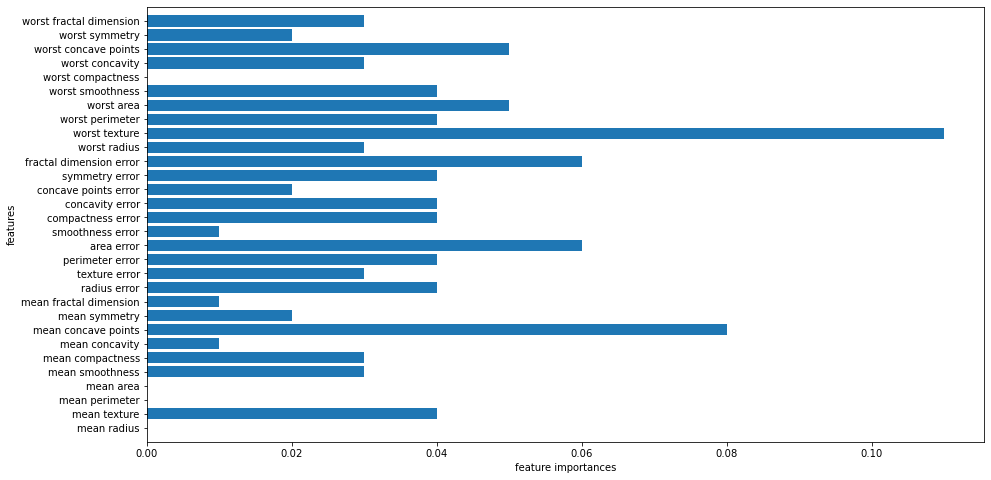

In [33]:
n_features=cancer.data.shape[1]
plt.figure(figsize=(15,8))
plt.barh(range(n_features),ada.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.ylabel('features')
plt.xlabel('feature importances')
plt.ylim(-1,n_features)